In [2]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
# import some basics libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# divide the dataset into independent and dependent varraibles

x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
# Feature engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [15]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [17]:
# concatenate this varaibles with the dataset

x=x.drop(['Geography','Gender'],axis=1)

In [18]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [20]:
x=pd.concat([x,geography,gender],axis=1)

In [21]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [22]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape

(8000, 11)

In [24]:
y_train.shape

(8000,)

In [25]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
x_train.shape

(8000, 11)

In [29]:
x_test.shape

(2000, 11)

In [30]:
# Artificial neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [33]:
# initialize ann
classifier=Sequential()

In [36]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [57]:
# adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [38]:
# adding Second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [39]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [42]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [45]:
# Early stopping concept

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [46]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3247 - accuracy: 0.8677 - val_loss: 0.3562 - val_accuracy: 0.8550
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8675 - val_loss: 0.3610 - val_accuracy: 0.8535
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3202 - accuracy: 0.8690 - val_loss: 0.3681 - val_accuracy: 0.8470
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3236 - accuracy: 0.8675 - val_loss: 0.3621 - val_accuracy: 0.8550
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3239 - accuracy: 0.8662 - val_loss: 0.3663 - val_accuracy: 0.8531
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.8692 - val_loss: 0.3626 - val_accuracy: 0.8531
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3256 - accuracy: 0.8662 - val_loss: 0.3614 - val_accuracy:

In [49]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

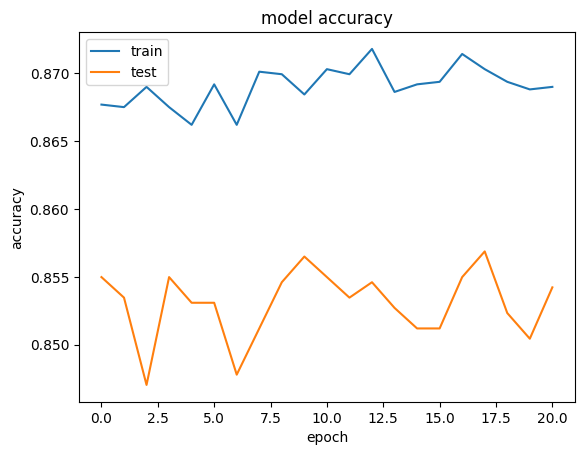

In [50]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

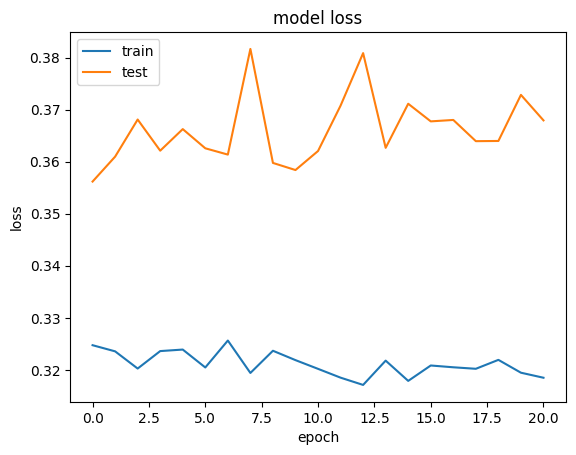

In [51]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [52]:
# predicting the testset results
y_pred = classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [53]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1541,   54],
       [ 220,  185]])

In [54]:
# calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [55]:
score

0.863

In [56]:
# get the weights
classifier.get_weights()

[array([[-0.35420907,  0.561021  , -0.10582311, -0.424672  ,  1.0167836 ,
         -0.3299653 ,  0.4887434 , -0.20353466,  0.16939285,  0.40150186,
          0.08424404],
        [-3.10037   , -1.351283  ,  2.496988  ,  3.4634912 , -1.8421077 ,
         -4.0210376 , -0.9693099 , -0.7356739 ,  0.83073455,  0.0300419 ,
          2.8991852 ],
        [ 0.7765325 ,  1.5731944 ,  0.1673643 , -0.5466478 ,  0.03882206,
         -0.04788117, -1.58671   ,  0.7368455 ,  0.2841984 ,  0.56112754,
          0.38396144],
        [ 0.2823566 , -2.502943  ,  1.0949771 ,  0.9066313 , -1.3264476 ,
         -0.61378807,  1.5267425 , -2.4003038 ,  0.21664047, -4.042875  ,
         -0.94772357],
        [-1.4482994 , -0.50666946, -0.4835825 , -2.2543209 , -0.95041865,
          1.3410178 , -0.06538258, -1.0058873 ,  4.180092  , -4.2279973 ,
          0.1770522 ],
        [-1.6526475 , -1.0507993 , -1.060322  , -1.54085   ,  2.387398  ,
         -1.9052782 , -0.28096366,  0.63720334, -0.1624886 , -0.3003539